In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from neurovlm.data import get_data_dir
import matplotlib.pyplot as plt

neurovlm_dir = get_data_dir()
recall_20_nv = np.load(neurovlm_dir / "recall_20_nv_proxi_adhoc_neuro.npy")
recall_200_nv = np.load(neurovlm_dir / "recall_200_nv_proxi_adhoc_neuro.npy")
mix_match_nv = np.load(neurovlm_dir / "mix_match_nv_proxi_adhoc_neuro.npy")

recall_20_nc = np.load(neurovlm_dir / "recall_20_nc.npy")
recall_200_nc = np.load(neurovlm_dir / "recall_200_nc.npy")
mix_match_nc = np.load(neurovlm_dir / "mix_match_nc.npy")

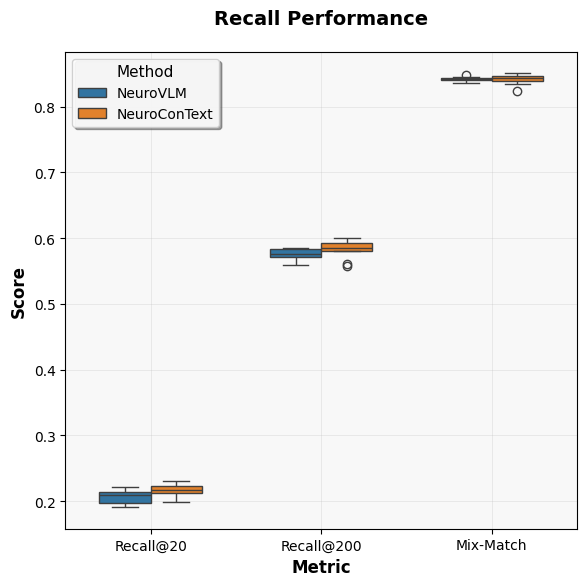

In [21]:
# Create structured data for paired barplot
data = []
metrics = ['Recall@20', 'Recall@200', 'Mix-Match']
values = [
    (recall_20_nv, recall_20_nc),
    (recall_200_nv, recall_200_nc),
    (mix_match_nv, mix_match_nc)
]

for metric, (nv_vals, nc_vals) in zip(metrics, values):
    # Add NV (NeuroVLM) values
    for val in nv_vals:
        data.append({'Metric': metric, 'Method': 'NeuroVLM', 'Value': val})
    # Add NC (Neural Contrastive) values
    for val in nc_vals:
        data.append({'Metric': metric, 'Method': 'NeuroConText', 'Value': val})

df = pd.DataFrame(data)

# Set ggplot style
# plt.style.use('ggplot')
# sns.set_palette("Set2")

# Create the paired barplot
plt.figure(figsize=(6, 6))
# ax = sns.barplot(data=df, x='Metric', y='Value', hue='Method',
#                  palette=['#1f77b4', '#ff7f0e'],  # Blue and orange like ggplot
#                  alpha=0.8, capsize=0.1)
ax = sns.boxplot(data=df, x='Metric', y='Value', hue='Method',
                 palette=['#1f77b4', '#ff7f0e'],  # Blue and orange like ggplot
                 showfliers=True, width=0.6)

# Add error bars (standard error of mean)
metric_positions = np.arange(len(metrics))
width = 0.35

# Customize the plot with ggplot aesthetics
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_xlabel('Metric', fontsize=12, fontweight='bold')
ax.set_title('Recall Performance', fontsize=14, fontweight='bold', pad=20)

# Improve legend
legend = ax.legend(title='Method', title_fontsize=11, fontsize=10,
                   frameon=True, fancybox=True, shadow=True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)

# Add grid for ggplot feel
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Set background color
ax.set_facecolor('#f8f8f8')

# Adjust layout and show
plt.tight_layout()
plt.savefig(neurovlm_dir / "recall.png")

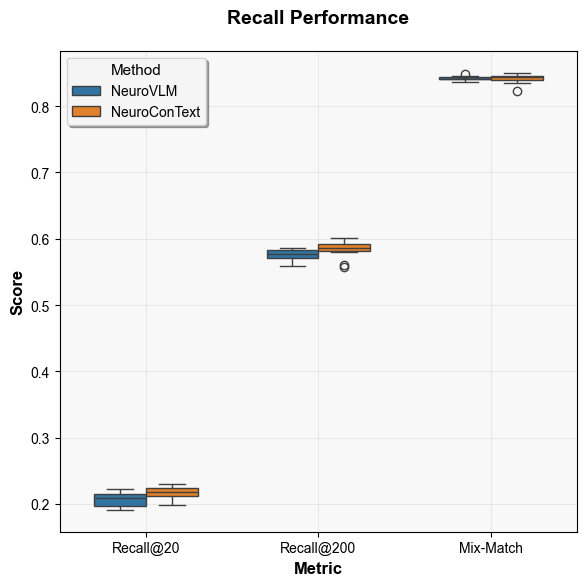

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Your existing data setup ---
data = []
metrics = ['Recall@20', 'Recall@200', 'Mix-Match']
values = [
    (recall_20_nv, recall_20_nc),
    (recall_200_nv, recall_200_nc),
    (mix_match_nv, mix_match_nc)
]

for metric, (nv_vals, nc_vals) in zip(metrics, values):
    for val in nv_vals:
        data.append({'Metric': metric, 'Method': 'NeuroVLM', 'Value': val})
    for val in nc_vals:
        data.append({'Metric': metric, 'Method': 'NeuroConText', 'Value': val})

df = pd.DataFrame(data)

# --- Set all text to sans-serif ---
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']

# Create the plot
plt.figure(figsize=(6, 6))
ax = sns.boxplot(data=df, x='Metric', y='Value', hue='Method',
                 palette=['#1f77b4', '#ff7f0e'],  # Blue and orange like ggplot
                 showfliers=True, width=0.6)

# Customize the plot
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_xlabel('Metric', fontsize=12, fontweight='bold')
ax.set_title('Recall Performance', fontsize=14, fontweight='bold', pad=20)

# Legend styling
legend = ax.legend(title='Method', title_fontsize=11, fontsize=10,
                   frameon=True, fancybox=True, shadow=True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)

# Grid and background
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
ax.set_facecolor('#f8f8f8')

# Layout and save
plt.tight_layout()
plt.savefig(neurovlm_dir / "recall.png")
plt.show()

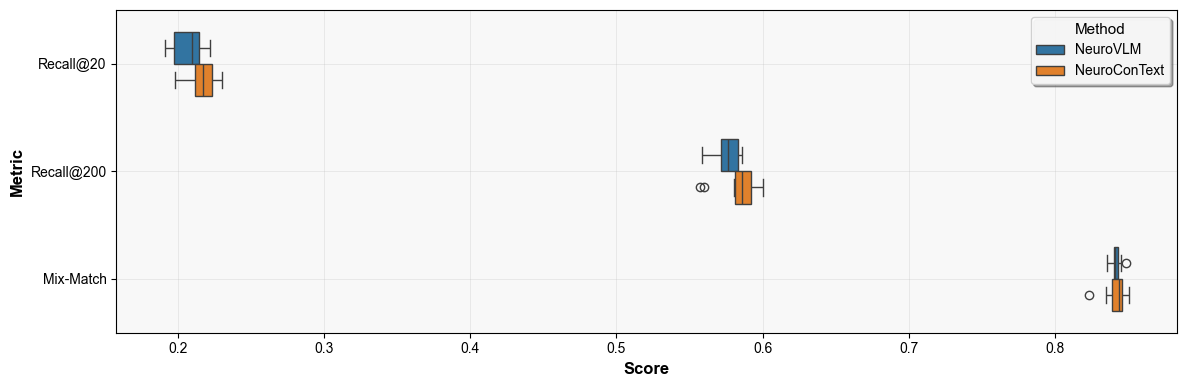

In [26]:
# Set all text to sans-serif
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']

# Create a wider figure
plt.figure(figsize=(12, 4))  # wider width

# Horizontal (transposed) boxplot: swap x and y
ax = sns.boxplot(data=df, y='Metric', x='Value', hue='Method',
                 palette=['#1f77b4', '#ff7f0e'], showfliers=True, width=0.6)

# Customize the plot
ax.set_xlabel('Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Metric', fontsize=12, fontweight='bold')
# ax.set_title('Recall Performance', fontsize=14, fontweight='bold', pad=20)

# Legend styling
legend = ax.legend(title='Method', title_fontsize=11, fontsize=10,
                   frameon=True, fancybox=True, shadow=True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)

# Grid and background
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)
ax.set_facecolor('#f8f8f8')

# Layout and save
plt.tight_layout()
plt.savefig(neurovlm_dir / "recall.png")
plt.show()

In [ ]:
table = {}
for metric in ["Recall@20", "Recall@200", "Mix-Match"]:
    _df = df[df["Metric"] == metric]

    mean_nv = _df[_df["Method"] == "NeuroVLM"]["Value"].mean()
    std_nv = _df[_df["Method"] == "NeuroVLM"]["Value"].std()

    mean_nc = _df[_df["Method"] == "NeuroConText"]["Value"].mean()
    std_nc = _df[_df["Method"] == "NeuroConText"]["Value"].std()

    table[metric] = {}
    table[metric]["NeuroVLM"] =  {"mean": mean_nv, "std": std_nv}
    table[metric]["NeuroConText"]= {"mean": mean_nc, "std": std_nc}